## Turistic Data from Maczek
Import data, and clean it (thoroughly...)

In [1]:
import pandas as pd
import xlrd
import numpy as np


**Initial load - raw data**

In [3]:
df = pd.read_excel("../data/Copy of wyniki baza danych 5 dec 2018.xls", 
header=0, convert_float=True)
df.head()


,1a,1b,1c,1d,komfort,1f,1g,1h,zabytki,1j,...,M2a,M2b,M3,M4a,m4b,M4c,M5a,M5b,M5c,M5d
0,4,3,4,4,4,3,4,5,4,3,...,NaN,1,ukraina,NaN,1,NaN,NaN,NaN,1,NaN
1,3,4,3,2,4,2,4,2,2,5,...,NaN,1,ukraina,NaN,NaN,1,NaN,NaN,1,NaN
2,3,4,3,5,4,2,1,5,5,3,...,1,NaN,ukraina,NaN,NaN,1,NaN,NaN,1,NaN
3,4,4,3,4,5,4,2,4,3,4,...,NaN,1,ukraina,NaN,1,NaN,NaN,1,NaN,NaN
4,4,5,5,5,5,3,4,4,4,5,...,1,NaN,ukraina,NaN,NaN,1,NaN,1,NaN,NaN


In [9]:
import pandas_profiling
pandas_profiling.ProfileReport(df).to_file(outputfile='../output/pd_profile.html')

### Cleaning
**basic cleaning:**
clean shit - repeating headers, hidden spaces, empty cols

In [4]:
df = df[df.komfort != 'komfort']
df = df.applymap(lambda x: x.strip() if type(x) is str else x)
df=df.apply(pd.to_numeric, errors='ignore')
df.dropna(axis='columns', how="all", inplace=True)
df.dropna(axis='rows', how="all", inplace=True)
df.shape


(410, 130)

**Deeper cleaning and filtering:**

In [5]:
#save pre-cleaned stuff to OUTPUT,
#MOVE to DATA
#DO manual cleaning in excel - change word-headers into num-letter (so we have correct sequence)
#+ substitute 3 "booking" with NAN

df.to_csv("../output/cleaned_data.csv")

In [2]:
#get new df1 from cleaned data

df1 = pd.read_csv('../data/cleaned_data.csv', index_col=0)
pd.set_option('display.max_columns', 500)
df1.head()

,1a,1b,1c,1d,1e,1f,1g,1h,1i,1j,1k,1l,1m,1n,1o,1p,1r,inne,2a,2b,2c,2d,2e,2f,2g,2h,2i,inne.1,3a,3b,3c,3d,3e,3f,inne.2,3h,3i,3j,3k,3l,3m,inne.3,4a,4b,4c,4d,4e,4f,4g,4h,4i,4j,4k,inne.4,5a,5b,5c,5d,5e,inne.5,5g,5h,5i,5j,5k,6a,6b,6c,6d,6e,6f,6g,6h,6i,6j,6k,7a,7b,7c,7d,7f,7g,7h,7i,8a,8b,8c,8d,8e,8f,8g,8h,8i,8j,8k,8l,8m,8n,8o,8p,8q,8r,8s,8t,8u,8v,8w,8x,8y,9a,9b,9c,9d,9e,9f,9g,9h,9i,9j,9k,M1,M2a,M2b,M3,M4a,m4b,M4c,M5a,M5b,M5c
0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,5,4,3.0,4.0,2.0,5,3.0,5,3.0,5.0,NaN,3,NaN,3.0,4.0,3,3.0,NaN,4.0,4.0,NaN,3,3,3.0,5,2,3,NaN,4,2,4.0,4.0,2,2.0,NaN,2,4.0,3.0,3.0,4,4.0,3.0,4.0,4.0,3.0,3.0,NaN,3.0,3,3,3.0,3.0,NaN,4.0,4.0,3.0,4.0,4.0,4,3.0,3,3.0,4,4.0,4.0,4.0,4,4,5,3.0,3.0,3.0,4.0,3.0,5.0,2.0,4.0,3.0,4.0,4.0,3.0,3.0,2.0,4.0,4.0,3.0,4.0,5.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,3.0,2.0,5.0,2.0,3.0,3.0,3.0,3.0,22.0,NaN,1.0,ukraina,NaN,1.0,NaN,NaN,NaN,1.0
1,3.0,4.0,3.0,2.0,4.0,2.0,4.0,2,2,5.0,4.0,3.0,2,4.0,3,4.0,3.0,NaN,2,4.0,3.0,2.0,2,3.0,1.0,3.0,5.0,NaN,4,4,3.0,3,2,5,NaN,4,3,2.0,2.0,2,4.0,1,2,3.0,4.0,5.0,4,4.0,3.0,4.0,3.0,3.0,4.0,NaN,2.0,2,4,4.0,3.0,NaN,4.0,2.0,3.0,4.0,5.0,3,4.0,3,4.0,3,4.0,4.0,4.0,3,4,2,4.0,3.0,2.0,1.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,4.0,1.0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,4.0,3.0,4.0,3.0,2.0,1.0,4.0,5.0,3.0,4.0,3.0,1.0,4.0,3.0,5.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,18.0,NaN,1.0,ukraina,NaN,NaN,1.0,NaN,NaN,1.0
2,3.0,4.0,3.0,5.0,4.0,2.0,1.0,5,5,3.0,4.0,1.0,3,4.0,4,2.0,5.0,NaN,1,5.0,4.0,3.0,4,4.0,5.0,3.0,5.0,NaN,5,5,4.0,2,3,4,NaN,5,4,4.0,4.0,4,4.0,NaN,4,3.0,4.0,4.0,4,5.0,4.0,4.0,3.0,4.0,3.0,NaN,5.0,5,5,4.0,1.0,NaN,3.0,4.0,3.0,3.0,4.0,4,5.0,5,3.0,5,3.0,4.0,4.0,3,3,5,4.0,4.0,3.0,1.0,3.0,4.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,2.0,4.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,3.0,5.0,5.0,3.0,20.0,1.0,NaN,ukraina,NaN,NaN,1.0,NaN,NaN,1.0
3,4.0,4.0,3.0,4.0,5.0,4.0,2.0,4,3,4.0,4.0,4.0,4,5.0,4,3.0,3.0,NaN,2,NaN,4.0,4.0,4,2.0,4.0,3.0,3.0,NaN,4,4,5.0,4,5,5,NaN,3,4,3.0,4.0,5,5.0,NaN,4,3.0,5.0,4.0,4,5.0,3.0,4.0,3.0,4.0,4.0,NaN,5.0,5,5,5.0,2.0,NaN,5.0,3.0,4.0,5.0,5.0,5,4.0,5,3.0,4,4.0,5.0,4.0,5,3,4,4.0,3.0,2.0,1.0,2.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,2.0,2.0,1.0,2.0,3.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,2.0,2.0,3.0,4.0,5.0,4.0,4.0,4.0,3.0,2.0,4.0,5.0,4.0,2.0,1.0,2.0,2.0,4.0,5.0,4.0,21.0,NaN,1.0,ukraina,NaN,1.0,NaN,NaN,1.0,NaN
4,4.0,5.0,5.0,5.0,5.0,3.0,4.0,4,4,5.0,5.0,3.0,4,5.0,5,5.0,3.0,NaN,1,NaN,4.0,5.0,4,2.0,5.0,3.0,4.0,NaN,5,5,5.0,4,5,5,NaN,3,4,4.0,3.0,4,4.0,NaN,5,5.0,5.0,5.0,5,5.0,5.0,4.0,3.0,5.0,5.0,NaN,4.0,3,4,4.0,2.0,NaN,2.0,4.0,3.0,4.0,5.0,5,4.0,3,5.0,5,5.0,5.0,5.0,4,5,3,5.0,4.0,4.0,2.0,5.0,5.0,5.0,5.0,3.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,4.0,4.0,5.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,3.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,5.0,2.0,22.0,1.0,NaN,ukraina,NaN,NaN,1.0,NaN,1.0,NaN


In [3]:
#good, now let's drop "inne"

df1.drop(axis=1, columns=['inne', 'inne.1', 'inne.2', 'inne.3', 'inne.4', 'inne.5'], inplace=True)
df1.head()

,1a,1b,1c,1d,1e,1f,1g,1h,1i,1j,1k,1l,1m,1n,1o,1p,1r,2a,2b,2c,2d,2e,2f,2g,2h,2i,3a,3b,3c,3d,3e,3f,3h,3i,3j,3k,3l,3m,4a,4b,4c,4d,4e,4f,4g,4h,4i,4j,4k,5a,5b,5c,5d,5e,5g,5h,5i,5j,5k,6a,6b,6c,6d,6e,6f,6g,6h,6i,6j,6k,7a,7b,7c,7d,7f,7g,7h,7i,8a,8b,8c,8d,8e,8f,8g,8h,8i,8j,8k,8l,8m,8n,8o,8p,8q,8r,8s,8t,8u,8v,8w,8x,8y,9a,9b,9c,9d,9e,9f,9g,9h,9i,9j,9k,M1,M2a,M2b,M3,M4a,m4b,M4c,M5a,M5b,M5c
0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,5,4,3.0,4.0,2.0,5,3.0,5,3.0,5.0,3,NaN,3.0,4.0,3,3.0,NaN,4.0,4.0,3,3,3.0,5,2,3,4,2,4.0,4.0,2,2.0,2,4.0,3.0,3.0,4,4.0,3.0,4.0,4.0,3.0,3.0,3.0,3,3,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4,3.0,3,3.0,4,4.0,4.0,4.0,4,4,5,3.0,3.0,3.0,4.0,3.0,5.0,2.0,4.0,3.0,4.0,4.0,3.0,3.0,2.0,4.0,4.0,3.0,4.0,5.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,3.0,2.0,5.0,2.0,3.0,3.0,3.0,3.0,22.0,NaN,1.0,ukraina,NaN,1.0,NaN,NaN,NaN,1.0
1,3.0,4.0,3.0,2.0,4.0,2.0,4.0,2,2,5.0,4.0,3.0,2,4.0,3,4.0,3.0,2,4.0,3.0,2.0,2,3.0,1.0,3.0,5.0,4,4,3.0,3,2,5,4,3,2.0,2.0,2,4.0,2,3.0,4.0,5.0,4,4.0,3.0,4.0,3.0,3.0,4.0,2.0,2,4,4.0,3.0,4.0,2.0,3.0,4.0,5.0,3,4.0,3,4.0,3,4.0,4.0,4.0,3,4,2,4.0,3.0,2.0,1.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,4.0,1.0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,4.0,3.0,4.0,3.0,2.0,1.0,4.0,5.0,3.0,4.0,3.0,1.0,4.0,3.0,5.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,18.0,NaN,1.0,ukraina,NaN,NaN,1.0,NaN,NaN,1.0
2,3.0,4.0,3.0,5.0,4.0,2.0,1.0,5,5,3.0,4.0,1.0,3,4.0,4,2.0,5.0,1,5.0,4.0,3.0,4,4.0,5.0,3.0,5.0,5,5,4.0,2,3,4,5,4,4.0,4.0,4,4.0,4,3.0,4.0,4.0,4,5.0,4.0,4.0,3.0,4.0,3.0,5.0,5,5,4.0,1.0,3.0,4.0,3.0,3.0,4.0,4,5.0,5,3.0,5,3.0,4.0,4.0,3,3,5,4.0,4.0,3.0,1.0,3.0,4.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,2.0,4.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,3.0,5.0,5.0,3.0,20.0,1.0,NaN,ukraina,NaN,NaN,1.0,NaN,NaN,1.0
3,4.0,4.0,3.0,4.0,5.0,4.0,2.0,4,3,4.0,4.0,4.0,4,5.0,4,3.0,3.0,2,NaN,4.0,4.0,4,2.0,4.0,3.0,3.0,4,4,5.0,4,5,5,3,4,3.0,4.0,5,5.0,4,3.0,5.0,4.0,4,5.0,3.0,4.0,3.0,4.0,4.0,5.0,5,5,5.0,2.0,5.0,3.0,4.0,5.0,5.0,5,4.0,5,3.0,4,4.0,5.0,4.0,5,3,4,4.0,3.0,2.0,1.0,2.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,2.0,2.0,1.0,2.0,3.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,2.0,2.0,3.0,4.0,5.0,4.0,4.0,4.0,3.0,2.0,4.0,5.0,4.0,2.0,1.0,2.0,2.0,4.0,5.0,4.0,21.0,NaN,1.0,ukraina,NaN,1.0,NaN,NaN,1.0,NaN
4,4.0,5.0,5.0,5.0,5.0,3.0,4.0,4,4,5.0,5.0,3.0,4,5.0,5,5.0,3.0,1,NaN,4.0,5.0,4,2.0,5.0,3.0,4.0,5,5,5.0,4,5,5,3,4,4.0,3.0,4,4.0,5,5.0,5.0,5.0,5,5.0,5.0,4.0,3.0,5.0,5.0,4.0,3,4,4.0,2.0,2.0,4.0,3.0,4.0,5.0,5,4.0,3,5.0,5,5.0,5.0,5.0,4,5,3,5.0,4.0,4.0,2.0,5.0,5.0,5.0,5.0,3.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,4.0,4.0,5.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,3.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,5.0,2.0,22.0,1.0,NaN,ukraina,NaN,NaN,1.0,NaN,1.0,NaN


Filter out those not from Poland or Ukraine

In [4]:
df2 = df1[(df1['M3']=='ukraina') | (df1["M3"]=='polska')]
df2.shape

(381, 124)

Create report for cleaned and filtered data

In [10]:
import pandas_profiling
pandas_profiling.ProfileReport(df2).to_file(outputfile='../output/pd_profile_clean.html')

In [44]:
#Check age distribution:
from scipy import stats
stats.percentileofscore(df2.M1, 23)

87.79527559055119

In [43]:
perc=[87, 88, 89, 90, 91,92,93,94,95,96,97,98,99,100]
val=np.nanpercentile(df2.M1,perc)
pd.Series(val,index=perc)

87     23.00
88     23.00
89     23.00
90     24.00
91     24.00
92     24.00
93     25.00
94     26.00
95     26.05
96     28.00
97     29.00
98     31.00
99     32.00
100    50.00
dtype: float64

In [5]:
#Remove boolean M-columns
df3 = df2.iloc[:, 0:78]
df3['age']=df2['M1']
df3['country']=df2['M3']
df3.head()

,1a,1b,1c,1d,1e,1f,1g,1h,1i,1j,1k,1l,1m,1n,1o,1p,1r,2a,2b,2c,2d,2e,2f,2g,2h,2i,3a,3b,3c,3d,3e,3f,3h,3i,3j,3k,3l,3m,4a,4b,4c,4d,4e,4f,4g,4h,4i,4j,4k,5a,5b,5c,5d,5e,5g,5h,5i,5j,5k,6a,6b,6c,6d,6e,6f,6g,6h,6i,6j,6k,7a,7b,7c,7d,7f,7g,7h,7i,age,country
0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,5,4,3.0,4.0,2.0,5,3.0,5,3.0,5.0,3,NaN,3.0,4.0,3,3.0,NaN,4.0,4.0,3,3,3.0,5,2,3,4,2,4.0,4.0,2,2.0,2,4.0,3.0,3.0,4,4.0,3.0,4.0,4.0,3.0,3.0,3.0,3,3,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4,3.0,3,3.0,4,4.0,4.0,4.0,4,4,5,3.0,3.0,3.0,4.0,3.0,5.0,2.0,4.0,22.0,ukraina
1,3.0,4.0,3.0,2.0,4.0,2.0,4.0,2,2,5.0,4.0,3.0,2,4.0,3,4.0,3.0,2,4.0,3.0,2.0,2,3.0,1.0,3.0,5.0,4,4,3.0,3,2,5,4,3,2.0,2.0,2,4.0,2,3.0,4.0,5.0,4,4.0,3.0,4.0,3.0,3.0,4.0,2.0,2,4,4.0,3.0,4.0,2.0,3.0,4.0,5.0,3,4.0,3,4.0,3,4.0,4.0,4.0,3,4,2,4.0,3.0,2.0,1.0,3.0,3.0,2.0,1.0,18.0,ukraina
2,3.0,4.0,3.0,5.0,4.0,2.0,1.0,5,5,3.0,4.0,1.0,3,4.0,4,2.0,5.0,1,5.0,4.0,3.0,4,4.0,5.0,3.0,5.0,5,5,4.0,2,3,4,5,4,4.0,4.0,4,4.0,4,3.0,4.0,4.0,4,5.0,4.0,4.0,3.0,4.0,3.0,5.0,5,5,4.0,1.0,3.0,4.0,3.0,3.0,4.0,4,5.0,5,3.0,5,3.0,4.0,4.0,3,3,5,4.0,4.0,3.0,1.0,3.0,4.0,2.0,4.0,20.0,ukraina
3,4.0,4.0,3.0,4.0,5.0,4.0,2.0,4,3,4.0,4.0,4.0,4,5.0,4,3.0,3.0,2,NaN,4.0,4.0,4,2.0,4.0,3.0,3.0,4,4,5.0,4,5,5,3,4,3.0,4.0,5,5.0,4,3.0,5.0,4.0,4,5.0,3.0,4.0,3.0,4.0,4.0,5.0,5,5,5.0,2.0,5.0,3.0,4.0,5.0,5.0,5,4.0,5,3.0,4,4.0,5.0,4.0,5,3,4,4.0,3.0,2.0,1.0,2.0,4.0,3.0,4.0,21.0,ukraina
4,4.0,5.0,5.0,5.0,5.0,3.0,4.0,4,4,5.0,5.0,3.0,4,5.0,5,5.0,3.0,1,NaN,4.0,5.0,4,2.0,5.0,3.0,4.0,5,5,5.0,4,5,5,3,4,4.0,3.0,4,4.0,5,5.0,5.0,5.0,5,5.0,5.0,4.0,3.0,5.0,5.0,4.0,3,4,4.0,2.0,2.0,4.0,3.0,4.0,5.0,5,4.0,3,5.0,5,5.0,5.0,5.0,4,5,3,5.0,4.0,4.0,2.0,5.0,5.0,5.0,5.0,22.0,ukraina


In [6]:
df3.shape

(381, 80)

In [6]:
df3= df3[df3.age<24]
df3.shape

(341, 80)

In [8]:
df3.to_csv("../output/df3_cleaned_data.csv")

In [8]:
import pandas_profiling
pandas_profiling.ProfileReport(df3).to_file(outputfile='../output/pd_profile_age_clean.html')

In [ ]:
df3 = pd.read_csv('../data/df3_cleaned_data.csv', index_col=0)

### Analysis

**$\phi_k$ correlations**

In [9]:
import phik
from phik import resources, report

In [10]:
#correlation
cor_matrix=df3.phik_matrix(interval_cols=['age'])
cor_matrix

/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/binning.py:68: UserWarning: Empty bin with bin-edges 18.099999999999994 - 18.799999999999994
  warnings.warn('Empty bin with bin-edges {0:s} - {1:s}'.format(str(bin_edges[i-1]), str(bin_edges[i])))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/binning.py:68: UserWarning: Empty bin with bin-edges 20.199999999999996 - 20.9
  warnings.warn('Empty bin with bin-edges {0:s} - {1:s}'.format(str(bin_edges[i-1]), str(bin_edges[i])))


var2,1a,1b,1c,1d,1e,1f,1g,1h,1i,1j,1k,1l,1m,1n,1o,1p,1r,2a,2b,2c,2d,2e,2f,2g,2h,2i,3a,3b,3c,3d,3e,3f,3h,3i,3j,3k,3l,3m,4a,4b,4c,4d,4e,4f,4g,4h,4i,4j,4k,5a,5b,5c,5d,5e,5g,5h,5i,5j,5k,6a,6b,6c,6d,6e,6f,6g,6h,6i,6j,6k,7a,7b,7c,7d,7f,7g,7h,7i,age,country
var1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1a,1.000000,0.489127,0.063062,0.000000,0.000000,0.125920,0.411913,0.115494,0.269328,0.211782,0.184189,0.211016,0.000000,0.335761,0.228158,0.000000,0.000000,0.329807,0.000000,0.310777,0.061345,0.172988,0.089974,0.094221,0.372193,0.125862,0.372487,0.138921,0.600370,0.214362,0.222764,0.169434,0.245251,0.062420,0.000000,0.300909,0.065986,0.000000,0.215501,0.120441,0.000000,0.262213,0.258546,0.410254,0.000000,0.072079,0.130495,0.281386,0.054229,0.304750,0.240945,0.269722,0.000000,0.173798,0.000000,0.169444,0.353380,0.075530,0.000000,0.217626,0.513730,0.413328,0.118102,0.147050,0.279084,0.550072,0.482193,0.290080,0.149223,0.220516,0.349718,0.000000,0.104228,0.000000,0.000000,0.000000,0.000000,0.170896,0.000000,0.053484
1b,0.489127,1.000000,0.000000,0.255101,0.000000,0.055107,0.050079,0.194456,0.199799,0.248328,0.000000,0.000000,0.395747,0.193614,0.245927,0.123070,0.000000,0.155503,0.141014,0.389648,0.142390,0.435464,0.212914,0.044869,0.123192,0.000000,0.406574,0.209119,0.277909,0.000000,0.221340,0.730749,0.255450,0.000000,0.261628,0.242371,0.035121,0.307692,0.145096,0.166279,0.073807,0.777106,0.064467,0.000000,0.233372,0.000000,0.198920,0.122035,0.076728,0.264462,0.000000,0.147267,0.000000,0.176696,0.135853,0.346484,0.156195,0.000000,0.081043,0.144621,0.715903,0.290496,0.089880,0.210883,0.000000,0.743423,0.161083,0.258107,0.131378,0.087623,0.144237,0.174573,0.000000,0.000000,0.173713,0.000000,0.356508,0.220716,0.000000,0.042912
1c,0.063062,0.000000,1.000000,0.286200,0.132841,0.209845,0.166577,0.182275,0.131805,0.087492,0.710585,0.000000,0.000000,0.210915,0.090257,0.356720,0.351033,0.260941,0.283385,0.107062,0.402610,0.185916,0.000000,0.175286,0.077945,0.000000,0.084606,0.302854,0.253674,0.239590,0.000000,0.000000,0.276797,0.354442,0.372835,0.200277,0.198308,0.098170,0.261900,0.203871,0.168896,0.173263,0.274892,0.000000,0.137151,0.062483,0.256730,0.321636,0.000000,0.187213,0.000000,0.000000,0.237230,0.000000,0.233858,0.182483,0.083892,0.133155,0.395216,0.000000,0.044879,0.147476,0.225703,0.315819,0.000000,0.189976,0.291690,0.000000,0.143125,0.215175,0.182933,0.248721,0.222268,0.227821,0.080254,0.000000,0.000000,0.060957,0.000000,0.000000
1d,0.000000,0.255101,0.286200,1.000000,0.460717,0.133559,0.090130,0.138234,0.000000,0.374840,0.436857,0.293756,0.315557,0.299667,0.351097,0.208728,0.399891,0.181794,0.271878,0.348408,0.195666,0.295685,0.091100,0.228998,0.000000,0.185089,0.232081,0.267621,0.202677,0.285482,0.248796,0.301411,0.300828,0.362960,0.401270,0.000000,0.277136,0.240772,0.218043,0.421410,0.295518,0.363591,0.182069,0.399701,0.201643,0.157954,0.190988,0.229895,0.219217,0.129020,0.000000,0.131306,0.496506,0.270492,0.277896,0.111034,0.071894,0.120510,0.134799,0.171959,0.379089,0.270255,0.251842,0.554695,0.260919,0.142522,0.327059,0.213082,0.053162,0.143584,0.416094,0.000000,0.069494,0.188920,0.107359,0.000000,0.153883,0.000000,0.062631,0.145498
1e,0.000000,0.000000,0.132841,0.460717,1.000000,0.258292,0.317789,0.169158,0.078873,0.674817,0.196021,0.247668,0.408131,0.472818,0.370064,0.190036,0.065729,0.000000,0.104586,0.159546,0.169086,0.175703,0.000000,0.241170,0.168372,0.121924,0.252577,0.247458,0.102239,0.142119,0.358008,0.541897,0.252915,0.422312,0.357796,0.142616,0.123469,0.325349,0.319651,0.345990,0.255439,0.156131,0.400712,0.622141,0.415386,0.266624,0.319125,0.215993,0.589088,0.000000,0.000000,0.152450,0.000000,0.166581,0.268135,0.000000,0.105710,0.182394,0.404494,0.424676,0.466980,0.329182,0.497056,0.518854,0.672797,0.217838,0.089869,0.371723,0.182334,0.137131,0.506688,0.167190,0.172372,0.066425,0.176721,0.000000,0.196719,0.126797,0.083282,0.000000
1f,0.125920,0.055107,0.209845,0.133559,0.258292,1

In [11]:
#significance
sig_matrix = df3.significance_matrix(interval_cols=['age'])
sig_matrix

var2,1a,1b,1c,1d,1e,1f,1g,1h,1i,1j,1k,1l,1m,1n,1o,1p,1r,2a,2b,2c,2d,2e,2f,2g,2h,2i,3a,3b,3c,3d,3e,3f,3h,3i,3j,3k,3l,3m,4a,4b,4c,4d,4e,4f,4g,4h,4i,4j,4k,5a,5b,5c,5d,5e,5g,5h,5i,5j,5k,6a,6b,6c,6d,6e,6f,6g,6h,6i,6j,6k,7a,7b,7c,7d,7f,7g,7h,7i,age,country
var1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1a,28.341122,1.340770,0.532381,-0.779608,-1.257235,0.571664,3.082282,0.392180,1.726762,1.094118,0.852192,1.003692,-0.746102,2.300739,1.223560,0.177354,-0.522651,2.678384,-1.924941,1.974928,0.362373,0.595616,0.037943,0.232655,3.460137,0.391560,2.328880,-0.263549,7.257181,1.249903,1.152403,-0.166692,1.332535,-0.073656,0.124228,2.022181,0.183918,-0.454833,1.054773,0.791769,-0.943003,0.314984,1.427369,0.999618,-0.488786,0.371211,0.696854,0.688666,0.334694,2.459244,1.704014,1.414318,0.394707,0.843711,-0.739524,0.599192,2.106181,0.393286,-0.386632,0.735300,4.751935,3.458669,0.627437,1.109691,2.088291,2.309178,1.796299,1.295705,1.044796,1.028823,1.672529,-0.689879,0.346607,-0.466888,0.120957,-0.982324,-1.802244,0.228056,-0.643176,0.594339
1b,1.340770,26.765026,0.784210,1.980755,0.377631,0.300977,0.058071,1.495904,1.957483,2.292831,-0.474432,0.121791,4.125496,1.158711,1.898160,0.822975,0.296625,1.008818,0.901051,3.949469,0.925350,3.548992,1.960925,0.392404,0.488867,-0.152141,2.369012,1.645840,1.490197,0.491621,1.429721,8.540066,1.713770,-0.552494,0.753881,0.696505,0.446153,2.708414,1.361722,1.637003,0.599446,9.227345,0.801412,0.101623,1.795543,0.288104,1.464188,0.850845,0.885623,1.763040,-0.645687,1.485340,-2.098335,0.961055,-0.175597,0.021571,-0.515447,0.352740,0.683426,0.865404,0.531037,0.942996,0.861407,2.080930,-0.433071,7.263703,0.977472,2.077455,2.153306,0.816188,0.934342,1.120765,-0.154195,-0.940097,1.456642,-0.465405,2.642737,1.111459,-0.538157,0.662946
1c,0.532381,0.784210,28.448278,1.735163,1.042527,1.425362,0.899096,0.776751,0.203414,0.857514,8.792641,0.004611,-0.025257,1.011079,0.517598,2.921233,3.276885,2.193032,1.841874,0.429867,3.968304,1.207549,-0.440774,0.311009,0.253036,-0.766567,0.732290,1.999965,1.272465,1.905094,-0.721361,0.314207,2.308313,2.958950,3.858662,1.078320,1.006955,0.152350,1.806233,1.782207,0.372382,1.504155,2.103804,-0.019312,0.796164,0.760446,1.706894,2.020500,0.361346,0.527463,-0.037678,-0.967041,1.721555,-0.698334,1.396181,0.808725,0.373687,0.945697,4.035710,-0.546181,0.523300,1.259031,1.210510,2.985734,0.252100,1.457052,1.622404,-0.277428,2.335691,1.210950,1.617468,1.378951,1.276898,1.346778,0.259079,-0.296817,-0.102487,-0.005662,-0.788626,-0.692154
1d,-0.779608,1.980755,1.735163,26.253756,4.171273,0.617709,0.314635,0.181836,-0.507330,3.329565,2.498770,1.982782,2.747016,1.990834,2.312489,1.236165,3.208690,1.024432,1.467881,2.762865,1.130199,2.641170,0.688509,0.945070,-0.705924,0.643892,1.790189,1.940599,1.101462,1.626500,1.506609,2.204882,1.989012,2.548041,2.721814,-0.930507,2.028965,0.973543,0.959947,4.194355,2.515395,3.241049,1.175608,3.490404,0.970365,2.391267,0.861391,1.586196,1.707895,0.297791,-0.328579,0.477991,3.473278,2.402466,1.372399,0.126842,0.674180,0.065651,0.299375,0.649904,2.874149,1.159388,1.812312,6.230534,2.239536,0.713070,2.878208,1.298187,0.314175,0.626128,3.533060,-0.246093,-0.045172,1.360119,0.395972,-0.297391,0.880755,-0.865961,0.481326,2.692248
1e,-1.257235,0.377631,1.042527,4.171273,25.474578,1.809633,3.015701,0.772129,0.431648,6.918550,0.074062,1.919347,4.285758,4.661750,3.231185,1.576495,-0.178186,-0.491978,0.841373,1.298271,0.878170,1.236500,-0.605615,0.836108,0.625807,-0.516319,1.924342,1.778206,1.231025,0.395605,3.322614,2.291231,0.685254,2.315710,2.257952,0.990452,0.927620,2.926170,2.854615,3.638418,1.864280,1.068239,3.951646,4.941463,4.432940,3.158932,2.640029,1.340179,7.325507,-0.111353,-0.536715,0.210723,-1.356476,0.929694,0.420271,0.409451,0.597161,0.737580,1.501582,2.992137,3.777402,2.618416,4.965645,2.299063,4.035029,1.354783,0.806882,3.305667,3.215789,1.078377,2.765873,1.053807,1.285743,0.273143,0.996866,-0.182664,1.227909,0.894521

In [12]:
#both matrices to csv output
sig_matrix.to_csv('../output/sig_matrix.csv')
cor_matrix.to_csv('../output/cor_matrix.csv')

**Outliers significance**
<br> age, 3d, 7c, 4j, 5a, 3c, 3h

In [66]:
import matplotlib.pyplot as plt
from phik.report import plot_correlation_matrix
%matplotlib inline

In [94]:
def plot_outlier_sig(c):
    bins=[0,1,2,3,4,5]
    outlier_signifs, binning_dict = df3[[c[0],c[1]]].outlier_significance_matrix(bins=bins,retbins=True)
    zvalues = outlier_signifs.values
    xlabels = binning_dict[c[1]] if c[1] in binning_dict.keys() else outlier_signifs.columns
    ylabels = binning_dict[c[0]] if c[0] in binning_dict.keys() else outlier_signifs.index
    xlabel = c[1]
    ylabel = c[0]

    plot_correlation_matrix(zvalues, x_labels=xlabels, y_labels=ylabels, 
                        x_label=xlabel,y_label=ylabel,
                        vmin=-5, vmax=5, title='outlier significance',
                        identity_layout=False, fontsize_factor=0.9,figsize=(5,6))

interval_cols not set, guessing: ['3d']
interval_cols not set, guessing: ['7c']
interval_cols not set, guessing: ['4j']
interval_cols not set, guessing: ['5a']
interval_cols not set, guessing: ['3c']
interval_cols not set, guessing: ['3h']


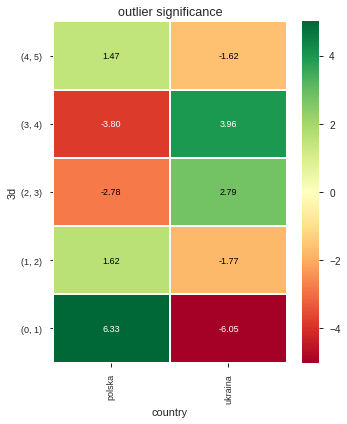

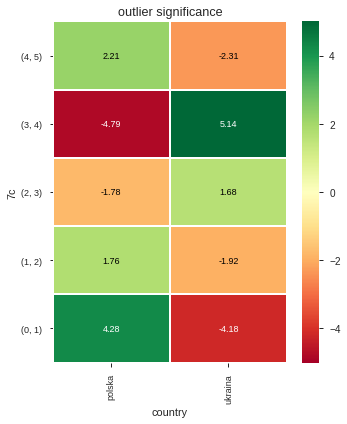

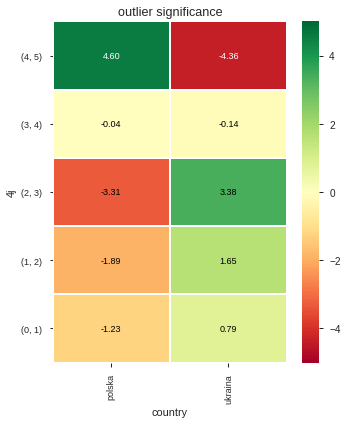

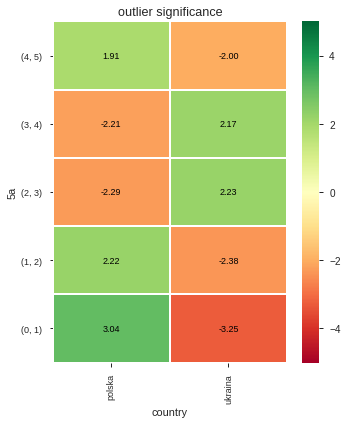

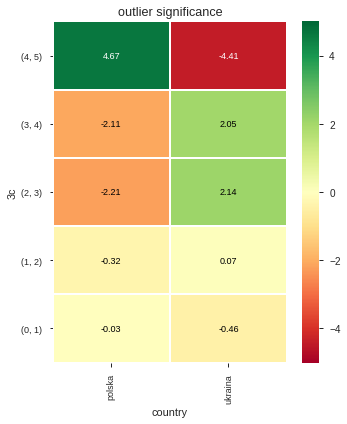

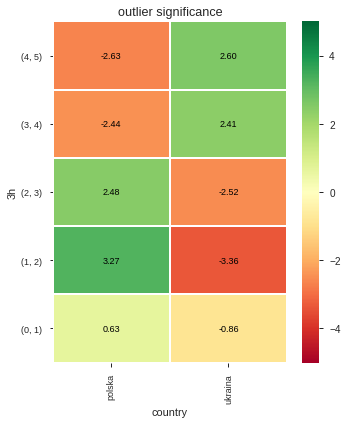

In [96]:
pairs=[["3d","country"],
      ["7c","country"],
      ["4j","country"],
      ["5a","country"],
      ["3c","country"],
      ["3h","country"]
      ]

for pair in pairs:
    plot_outlier_sig(pair)

## Further thoughts
- pairwise - weak correlations, low significance
- apply age brakets (guess: no diff)
- try predicting (LM? SVM?) - then get variable significance (if accuracy too low - any added info in var significance?)
- find other stat test

## StatsModels
try to do nonparametric kernel regression, see significance test.
perhaps try CVR, also just normal regression model (although ordinal vars...)

In [9]:
import statsmodels as sm
from statsmodels.nonparametric.kernel_regression import KernelReg

In [30]:
y = df3.age
X = df3.iloc[:, 0:78]
X.head()

,1a,1b,1c,1d,1e,1f,1g,1h,1i,1j,1k,1l,1m,1n,1o,1p,1r,2a,2b,2c,2d,2e,2f,2g,2h,2i,3a,3b,3c,3d,3e,3f,3h,3i,3j,3k,3l,3m,4a,4b,4c,4d,4e,4f,4g,4h,4i,4j,4k,5a,5b,5c,5d,5e,5g,5h,5i,5j,5k,6a,6b,6c,6d,6e,6f,6g,6h,6i,6j,6k,7a,7b,7c,7d,7f,7g,7h,7i
0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,5,4,3.0,4.0,2.0,5,3.0,5,3.0,5.0,3,NaN,3.0,4.0,3,3.0,NaN,4.0,4.0,3,3,3.0,5,2,3,4,2,4.0,4.0,2,2.0,2,4.0,3.0,3.0,4,4.0,3.0,4.0,4.0,3.0,3.0,3.0,3,3,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4,3.0,3,3.0,4,4.0,4.0,4.0,4,4,5,3.0,3.0,3.0,4.0,3.0,5.0,2.0,4.0
1,3.0,4.0,3.0,2.0,4.0,2.0,4.0,2,2,5.0,4.0,3.0,2,4.0,3,4.0,3.0,2,4.0,3.0,2.0,2,3.0,1.0,3.0,5.0,4,4,3.0,3,2,5,4,3,2.0,2.0,2,4.0,2,3.0,4.0,5.0,4,4.0,3.0,4.0,3.0,3.0,4.0,2.0,2,4,4.0,3.0,4.0,2.0,3.0,4.0,5.0,3,4.0,3,4.0,3,4.0,4.0,4.0,3,4,2,4.0,3.0,2.0,1.0,3.0,3.0,2.0,1.0
2,3.0,4.0,3.0,5.0,4.0,2.0,1.0,5,5,3.0,4.0,1.0,3,4.0,4,2.0,5.0,1,5.0,4.0,3.0,4,4.0,5.0,3.0,5.0,5,5,4.0,2,3,4,5,4,4.0,4.0,4,4.0,4,3.0,4.0,4.0,4,5.0,4.0,4.0,3.0,4.0,3.0,5.0,5,5,4.0,1.0,3.0,4.0,3.0,3.0,4.0,4,5.0,5,3.0,5,3.0,4.0,4.0,3,3,5,4.0,4.0,3.0,1.0,3.0,4.0,2.0,4.0
3,4.0,4.0,3.0,4.0,5.0,4.0,2.0,4,3,4.0,4.0,4.0,4,5.0,4,3.0,3.0,2,NaN,4.0,4.0,4,2.0,4.0,3.0,3.0,4,4,5.0,4,5,5,3,4,3.0,4.0,5,5.0,4,3.0,5.0,4.0,4,5.0,3.0,4.0,3.0,4.0,4.0,5.0,5,5,5.0,2.0,5.0,3.0,4.0,5.0,5.0,5,4.0,5,3.0,4,4.0,5.0,4.0,5,3,4,4.0,3.0,2.0,1.0,2.0,4.0,3.0,4.0
4,4.0,5.0,5.0,5.0,5.0,3.0,4.0,4,4,5.0,5.0,3.0,4,5.0,5,5.0,3.0,1,NaN,4.0,5.0,4,2.0,5.0,3.0,4.0,5,5,5.0,4,5,5,3,4,4.0,3.0,4,4.0,5,5.0,5.0,5.0,5,5.0,5.0,4.0,3.0,5.0,5.0,4.0,3,4,4.0,2.0,2.0,4.0,3.0,4.0,5.0,5,4.0,3,5.0,5,5.0,5.0,5.0,4,5,3,5.0,4.0,4.0,2.0,5.0,5.0,5.0,5.0


In [31]:
X.fillna(value = 0, inplace = True)
X.head()

,1a,1b,1c,1d,1e,1f,1g,1h,1i,1j,1k,1l,1m,1n,1o,1p,1r,2a,2b,2c,2d,2e,2f,2g,2h,2i,3a,3b,3c,3d,3e,3f,3h,3i,3j,3k,3l,3m,4a,4b,4c,4d,4e,4f,4g,4h,4i,4j,4k,5a,5b,5c,5d,5e,5g,5h,5i,5j,5k,6a,6b,6c,6d,6e,6f,6g,6h,6i,6j,6k,7a,7b,7c,7d,7f,7g,7h,7i
0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,5,4,3.0,4.0,2.0,5,3.0,5,3.0,5.0,3,0.0,3.0,4.0,3,3.0,0.0,4.0,4.0,3,3,3.0,5,2,3,4,2,4.0,4.0,2,2.0,2,4.0,3.0,3.0,4,4.0,3.0,4.0,4.0,3.0,3.0,3.0,3,3,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4,3.0,3,3.0,4,4.0,4.0,4.0,4,4,5,3.0,3.0,3.0,4.0,3.0,5.0,2.0,4.0
1,3.0,4.0,3.0,2.0,4.0,2.0,4.0,2,2,5.0,4.0,3.0,2,4.0,3,4.0,3.0,2,4.0,3.0,2.0,2,3.0,1.0,3.0,5.0,4,4,3.0,3,2,5,4,3,2.0,2.0,2,4.0,2,3.0,4.0,5.0,4,4.0,3.0,4.0,3.0,3.0,4.0,2.0,2,4,4.0,3.0,4.0,2.0,3.0,4.0,5.0,3,4.0,3,4.0,3,4.0,4.0,4.0,3,4,2,4.0,3.0,2.0,1.0,3.0,3.0,2.0,1.0
2,3.0,4.0,3.0,5.0,4.0,2.0,1.0,5,5,3.0,4.0,1.0,3,4.0,4,2.0,5.0,1,5.0,4.0,3.0,4,4.0,5.0,3.0,5.0,5,5,4.0,2,3,4,5,4,4.0,4.0,4,4.0,4,3.0,4.0,4.0,4,5.0,4.0,4.0,3.0,4.0,3.0,5.0,5,5,4.0,1.0,3.0,4.0,3.0,3.0,4.0,4,5.0,5,3.0,5,3.0,4.0,4.0,3,3,5,4.0,4.0,3.0,1.0,3.0,4.0,2.0,4.0
3,4.0,4.0,3.0,4.0,5.0,4.0,2.0,4,3,4.0,4.0,4.0,4,5.0,4,3.0,3.0,2,0.0,4.0,4.0,4,2.0,4.0,3.0,3.0,4,4,5.0,4,5,5,3,4,3.0,4.0,5,5.0,4,3.0,5.0,4.0,4,5.0,3.0,4.0,3.0,4.0,4.0,5.0,5,5,5.0,2.0,5.0,3.0,4.0,5.0,5.0,5,4.0,5,3.0,4,4.0,5.0,4.0,5,3,4,4.0,3.0,2.0,1.0,2.0,4.0,3.0,4.0
4,4.0,5.0,5.0,5.0,5.0,3.0,4.0,4,4,5.0,5.0,3.0,4,5.0,5,5.0,3.0,1,0.0,4.0,5.0,4,2.0,5.0,3.0,4.0,5,5,5.0,4,5,5,3,4,4.0,3.0,4,4.0,5,5.0,5.0,5.0,5,5.0,5.0,4.0,3.0,5.0,5.0,4.0,3,4,4.0,2.0,2.0,4.0,3.0,4.0,5.0,5,4.0,3,5.0,5,5.0,5.0,5.0,4,5,3,5.0,4.0,4.0,2.0,5.0,5.0,5.0,5.0


In [12]:
ord_list = ['o']*78
#var_type = ['c']
var_type = ord_list
print(var_type)

['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']


### Age model (kernel regression, ordinal, NA=0)

In [11]:
knr_model = KernelReg(y,X, var_type)

In [32]:
knr_model.fit()

(array([22., 18., 20., 21., 22., 22., 18., 18., 21., 20., 22., 20., 21.,
        19., 22., 19., 22., 19., 19., 21., 18., 18., 18., 21., 19., 20.,
        20., 22., 22., 20., 17., 18., 18., 17., 22., 20., 20., 19., 18.,
        19., 20., 20., 21., 22., 21., 21., 23., 20., 22., 21., 20., 21.,
        20., 20., 20., 21., 21., 22., 22., 21., 21., 23., 22., 23., 21.,
        21., 20., 21., 21., 21., 22., 21., 21., 21., 22., 21., 23., 23.,
        22., 22., 22., 21., 21., 23., 19., 20., 20., 18., 22., 22., 19.,
        18., 19., 20., 20., 18., 18., 20., 19., 20., 20., 19., 23., 21.,
        21., 19., 23., 21., 18., 19., 21., 16., 20., 20., 19., 19., 18.,
        23., 17., 21., 19., 20., 20., 17., 20., 18., 17., 17., 17., 17.,
        19., 20., 23., 20., 21., 17., 18., 19., 20., 19., 20., 20., 23.,
        19., 21., 19., 19., 20., 17., 17., 18., 19., 20., 17., 18., 21.,
        21., 19., 19., 17., 17., 17., 19., 19., 19., 17., 17., 20., 19.,
        20., 19., 22., 18., 18., 17., 20., 20., 20.

In [15]:
import pickle
filename = '../notebooks/knr_age_78o_na0.sav'

In [16]:
# save model
pickle.dump(knr_model, open(filename, 'wb'))

In [29]:
# read model
knr_model = pickle.load(open(filename, 'rb'))

In [25]:
list_var = list(range(0,78))
print(list_var)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]


In [33]:
knr_model.sig_test(list_var)

'Not Significant'

### Country model (kernel regression, ordinal, NA=0)

In [27]:
y = df3.country

In [28]:
knr_c_model = KernelReg(y,X, var_type)

TypeError: can't multiply sequence by non-int of type 'float'